In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

E:\anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


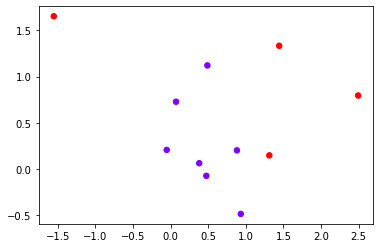

In [57]:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1,1]]
clusters_std = [0.5, 1]
X_, y_ = make_blobs(n_samples=[class_1_,class_2_]
                    ,centers=centers_
                    ,cluster_std=clusters_std
                    ,random_state=0
                    ,shuffle=False)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow",s=30)

In [58]:
lr=LogisticRegression().fit(X_,Y_)

In [59]:
lr.score(X_,Y_)

0.8181818181818182

In [60]:
#将样本和概率放到一个DataFrame里面
prob=pd.DataFrame(lr.predict_proba(X_))
prob.columns=["0","1"]

In [61]:
#使用阈值0.5，大于0.5的样本被预测为1，小于0.5的样本预测为0
for i in range(prob.shape[0]):
    if(prob.loc[i,"1"]>0.5):
        prob.loc[i,"pred"]=1
    else:
        prob.loc[i,"pred"]=0
prob["y_true"]=Y_
prob=prob.sort_values(by="1",ascending=False)

In [28]:
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [62]:
#使用混淆矩阵看结果
from sklearn.metrics import confusion_matrix as CM,precision_score as PS,recall_score as RS
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[2, 2],
       [0, 7]], dtype=int64)

In [63]:
#精确度
PS(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

1.0

In [64]:
#召回率
RS(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

In [37]:
for i in range(prob.shape[0]):
    if(prob.loc[i,"1"]>0.4):
        prob.loc[i,"pred"]=1
    else:
        prob.loc[i,"pred"]=0
prob["y_true"]=Y_
prob=prob.sort_values(by="1",ascending=False)

In [38]:
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[0, 4],
       [3, 4]], dtype=int64)

In [39]:
PS(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.0

In [40]:
RS(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.0

我们在画等高线，也就是决策边界的时候曾经使用SVC的接口decision_function，它返回我们输入的特征矩阵中每
个样本到划分数据集的超平面的距离。我们在SVM中利用超平面来判断我们的样本，本质上来说，当两个点的距离
是相同的符号的时候，越远离超平面的样本点归属于某个标签类的概率就很大。比如说，一个距离超平面0.1的
点，和一个距离超平面100的点，明显是距离为0.1的点更有可能是负类别的点混入了边界。同理，一个距离超平面
距离为-0.1的点，和一个离超平面距离为-100的点，明显是-100的点的标签更有可能是负类。所以，到超平面的距
离一定程度上反应了样本归属于某个标签类的可能性。接口decision_function返回的值也因此被我们认为是SVM
中的置信度（confidence）。
设置为True则会启动，启用之后，SVC的接口predict_proba和predict_log_proba将生效。
在二分类情况下，SVC将使用Platt缩放来生成概率，即在decision_function生成的距离上进行Sigmoid压缩，并附
加训练数据的交叉验证拟合，来生成类逻辑回归的SVM分数。

In [43]:
class_1=500 #类别1有500个样本
class_2=50 #类别2有50个样本
centers_=[[0,0],[2.0,2.0]]#设置两个类别的中心
clusters_std=[1.5,0.5]#设置两个类别的方差，通常来说，样本比较大的类别会更加松散
X,Y=make_blobs(n_samples=[class_1,class_2]
               ,centers=centers_
               ,cluster_std=clusters_std
               ,random_state=0
               ,shuffle=False)

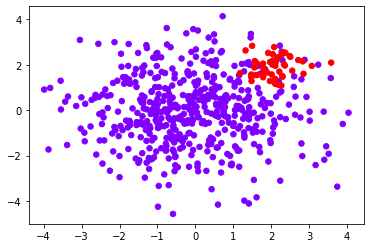

In [44]:
plt.scatter(X[:,0],X[:,1],c=Y,s=30,cmap="rainbow")

In [45]:
#其中红色的为少数类，紫色的为多数类
from sklearn.svm import SVC
clf_prob=SVC(kernel="linear",C=1.0,probability=True).fit(X,Y)

In [47]:
clf_prob.predict_proba(X).shape

(550, 2)

In [49]:
clf_prob.decision_function(X).shape

(550,)

现在，我们理解了什么是阈值（threshold），了解了不同阈值会让混淆矩阵产生变化，也了解了如何从我们的分
类算法中获取概率。现在，我们就可以开始画我们的ROC曲线了。ROC是一条以不同阈值下的假正率FPR为横坐
标，不同阈值下的召回率Recall为纵坐标的曲线。简单地来说，只要我们有数据和模型，我们就可以在python中绘
制出我们的ROC曲线。思考一下，我们要绘制ROC曲线，就必须在我们的数据中去不断调节阈值，不断求解混淆矩
阵，然后不断获得我们的横坐标和纵坐标，最后才能够将曲线绘制出来。接下来，我们就来执行这个过程：

In [50]:
cm=CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
cm

array([[0, 4],
       [3, 4]], dtype=int64)

In [52]:
#求其假证率
cm[1,0]/cm[1,:].sum()

0.42857142857142855

In [53]:
#求recall
cm[0,0]/cm[0,:].sum()

0.0

In [54]:
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,0
8,0.366184,0.633816,1.0,0
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,0.0,0
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,0
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,1
4,0.777387,0.222613,0.0,1
3,0.785647,0.214353,0.0,1
